# Case Study by: Mohammed Saqlain Attar

## 1.The data file contains numerical attributes that describe a letter and its corresponding class. Read the datafile “letterCG.data” and set all the numerical attributes as features.Split the data in to train and test sets.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('letterCG.bin',sep=' ')
df

,Class,x-box,y-box,width,high,Unnamed: 5,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Unnamed: 18
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,NaN,NaN
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,NaN,NaN
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,NaN,NaN
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,NaN,NaN
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,C,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9,NaN,NaN
1505,C,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9,NaN,NaN
1506,G,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9,NaN,NaN
1507,C,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6,NaN,NaN


In [3]:
df.drop(columns=['Unnamed: 5','yegvx','Unnamed: 18'],inplace=True)
df

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
0,C,4,10,5,8,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,6,6,7,6,10,7,12,2,9,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,C,5,10,6,8,5,8,9,9,9,9,12,2,10,4,9
1505,C,6,11,7,8,6,7,10,9,10,7,11,2,12,4,9
1506,G,5,9,6,7,6,7,6,6,10,7,10,2,9,5,9
1507,C,6,11,7,8,5,8,7,6,8,8,15,4,9,6,6


In [4]:
df.isna().sum()

Class    0
x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
dtype: int64

In [5]:
X = df.drop(columns='Class')
y = df['Class']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## 2. Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, keeping the max_depth as 1. Plot the accuracy on test set against the number of weak learners.Use decision tree classifier as the base classifier.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [9]:
n_estimators = list(range(1,51))
scores = {}

In [10]:
base_class = DecisionTreeClassifier(max_depth=1)

In [11]:
for num in n_estimators:
    ada_class = AdaBoostClassifier(base_estimator=base_class, n_estimators=num)
    ada_class.fit(x_train,y_train)
    scores[num] = ada_class.score(x_test,y_test)

In [12]:
scores

{1: 0.7748344370860927,
 2: 0.8145695364238411,
 3: 0.8101545253863135,
 4: 0.8653421633554084,
 5: 0.8807947019867549,
 6: 0.8852097130242825,
 7: 0.8940397350993378,
 8: 0.9028697571743929,
 9: 0.8962472406181016,
 10: 0.9028697571743929,
 11: 0.9116997792494481,
 12: 0.9227373068432672,
 13: 0.9227373068432672,
 14: 0.9183222958057395,
 15: 0.9205298013245033,
 16: 0.9227373068432672,
 17: 0.9315673289183223,
 18: 0.9315673289183223,
 19: 0.9403973509933775,
 20: 0.9271523178807947,
 21: 0.9271523178807947,
 22: 0.9293598233995585,
 23: 0.9315673289183223,
 24: 0.9249448123620309,
 25: 0.9271523178807947,
 26: 0.9293598233995585,
 27: 0.9293598233995585,
 28: 0.9337748344370861,
 29: 0.9293598233995585,
 30: 0.9337748344370861,
 31: 0.9381898454746137,
 32: 0.9381898454746137,
 33: 0.9426048565121413,
 34: 0.9426048565121413,
 35: 0.9426048565121413,
 36: 0.9403973509933775,
 37: 0.9448123620309051,
 38: 0.9426048565121413,
 39: 0.9470198675496688,
 40: 0.9426048565121413,
 41: 0.94

Text(0, 0.5, 'Accuracy')

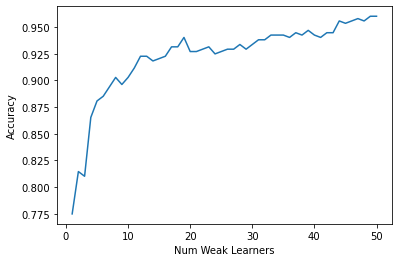

In [13]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.xlabel("Num Weak Learners")
plt.ylabel("Accuracy")

In [14]:
ada_class.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [15]:
y_pred = ada_class.predict(x_test)

In [16]:
metrics.accuracy_score(y_test, y_pred)

0.9602649006622517

In [17]:
metrics.confusion_matrix(y_test,y_pred)

array([[207,  13],
       [  5, 228]], dtype=int64)

In [18]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           C       0.98      0.94      0.96       220
           G       0.95      0.98      0.96       233

    accuracy                           0.96       453
   macro avg       0.96      0.96      0.96       453
weighted avg       0.96      0.96      0.96       453



## 3.Repeat step2 with max_depth set as 2.

In [19]:
n_estimators = list(range(1,51))
scores_1 = {}

In [20]:
base_class = DecisionTreeClassifier(max_depth=2)

for num in n_estimators:
    ada_class = AdaBoostClassifier(base_estimator=base_class, n_estimators=num)
    ada_class.fit(x_train,y_train)
    scores_1[num] = ada_class.score(x_test,y_test)

In [21]:
scores_1

{1: 0.8565121412803532,
 2: 0.9205298013245033,
 3: 0.8896247240618101,
 4: 0.9161147902869757,
 5: 0.9271523178807947,
 6: 0.9205298013245033,
 7: 0.9359823399558499,
 8: 0.9403973509933775,
 9: 0.9381898454746137,
 10: 0.9470198675496688,
 11: 0.9514348785871964,
 12: 0.9514348785871964,
 13: 0.9558498896247241,
 14: 0.9514348785871964,
 15: 0.9558498896247241,
 16: 0.9514348785871964,
 17: 0.9602649006622517,
 18: 0.9690949227373068,
 19: 0.9735099337748344,
 20: 0.9757174392935982,
 21: 0.9757174392935982,
 22: 0.9757174392935982,
 23: 0.9757174392935982,
 24: 0.9735099337748344,
 25: 0.977924944812362,
 26: 0.9801324503311258,
 27: 0.9823399558498896,
 28: 0.9757174392935982,
 29: 0.9801324503311258,
 30: 0.977924944812362,
 31: 0.9801324503311258,
 32: 0.977924944812362,
 33: 0.977924944812362,
 34: 0.9823399558498896,
 35: 0.9823399558498896,
 36: 0.977924944812362,
 37: 0.9845474613686535,
 38: 0.9801324503311258,
 39: 0.9801324503311258,
 40: 0.9801324503311258,
 41: 0.9779249

Text(0, 0.5, 'Accuracy')

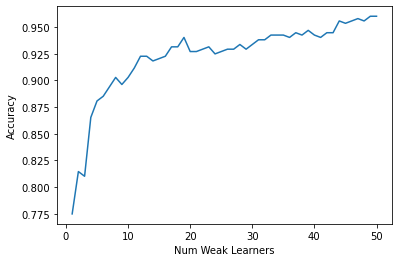

In [22]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.xlabel("Num Weak Learners")
plt.ylabel("Accuracy")

In [23]:
metrics.accuracy_score(y_test, y_pred)

0.9602649006622517

In [24]:
metrics.confusion_matrix(y_test,y_pred)

array([[207,  13],
       [  5, 228]], dtype=int64)

In [25]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           C       0.98      0.94      0.96       220
           G       0.95      0.98      0.96       233

    accuracy                           0.96       453
   macro avg       0.96      0.96      0.96       453
weighted avg       0.96      0.96      0.96       453

